In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
import scipy.stats as sp
import networkx.algorithms.community as nxcom
import plotly.graph_objects as go

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        item_path = os.path.join(datasets_folder,item)
        item_name = item.split(".")[0]
        print("dataset named "+item_name+" imported")
        df = pd.read_csv(item_path)
        d["{}".format(item_name)] = nx.from_pandas_edgelist(df, 'City1', 'City2', edge_attr=['Passenger_Trips','Aircraft_Trips','Seats','Total Distance_(km)','City Distance_(km)'],create_using = nx.Graph())
    print("finish importing")
    return d

In [3]:
graphs = import_datasets("data/Australia_airline/yearly_data")

dataset named 1990 imported
dataset named 1984 imported
dataset named 1985 imported
dataset named 1991 imported
dataset named 1987 imported
dataset named 1993 imported
dataset named 1992 imported
dataset named 1986 imported
dataset named 1996 imported
dataset named 1997 imported
dataset named 1995 imported
dataset named 1994 imported
dataset named 2008 imported
dataset named 2020 imported
dataset named 2021 imported
dataset named 2009 imported
dataset named 2022 imported
dataset named 2019 imported
dataset named 2018 imported
dataset named 2001 imported
dataset named 2015 imported
dataset named 2014 imported
dataset named 2000 imported
dataset named 2016 imported
dataset named 2002 imported
dataset named 2003 imported
dataset named 2017 imported
dataset named 2013 imported
dataset named 2007 imported
dataset named 2006 imported
dataset named 2012 imported
dataset named 2004 imported
dataset named 2010 imported
dataset named 2011 imported
dataset named 2005 imported
dataset named 1999 i

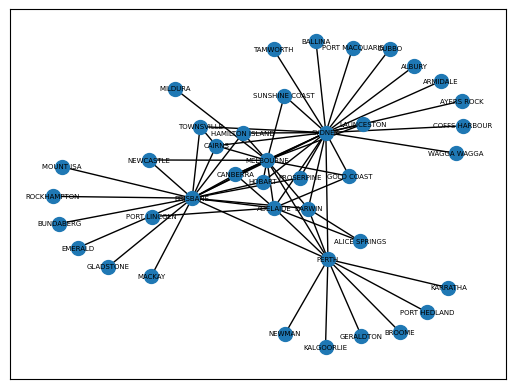

In [4]:
nx.draw_networkx(graphs['2019'],pos=nx.spring_layout(graphs['2019']),with_labels = True, font_size=5,node_size =100)

# 3.1.2 Fig4 correlation between degree and betweenness centrality

## a) weighted betweenness_centrality

In [5]:
degree_centrality = {}
for name, graph in graphs.items():
    d = nx.degree_centrality(graph)
    degree_centrality[name]=d

In [6]:
betweenness_centrality_weighted = {}
for name, graph in graphs.items():
    b = nx.betweenness_centrality(graph, weight = 'Aircraft_Trips')
    betweenness_centrality_weighted[name]=b

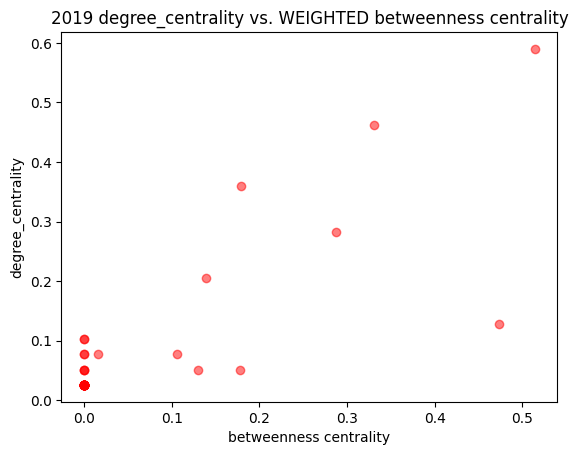

Pearson's correlation: 0.8150826418753924


In [7]:
x=list(betweenness_centrality_weighted['2019'].values())
y=list(degree_centrality['2019'].values())
plt.scatter(x, y, color = 'red', alpha=0.5)
plt.xlabel('betweenness centrality')
plt.ylabel('degree_centrality')
plt.title('2019 degree_centrality vs. WEIGHTED betweenness centrality')
plt.show()
pearson = sp.pearsonr(x,y)[0]
print(f"Pearson's correlation: {pearson}")

In [8]:
years = np.arange(1984,2022)

In [9]:
corr = []
for i in years:
    year = str(i)
    x = list(betweenness_centrality_weighted[year].values())
    y = list(degree_centrality[year].values())
    pearson = sp.pearsonr(x,y)[0]
    corr.append(pearson)

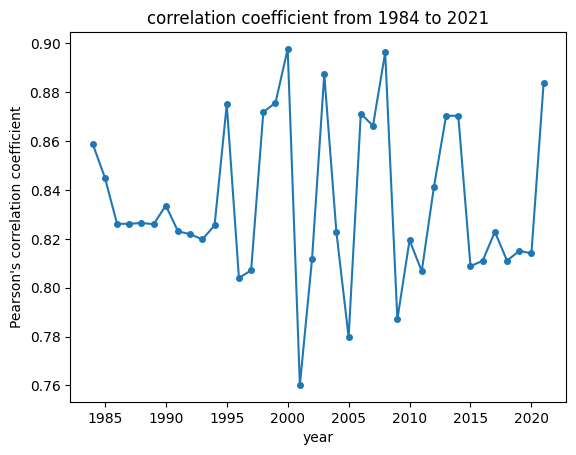

In [10]:
plt.plot(years, corr, linestyle='-', marker='o', markersize = 4)
plt.xlabel('year')
plt.ylabel('Pearson\'s correlation coefficient')
plt.title('correlation coefficient from 1984 to 2021')
plt.show()

## b) unweighted betweenness_centrality

In [11]:
betweenness_centrality_unweighted = {}
for name, graph in graphs.items():
    b = nx.betweenness_centrality(graph)
    betweenness_centrality_unweighted[name]=b

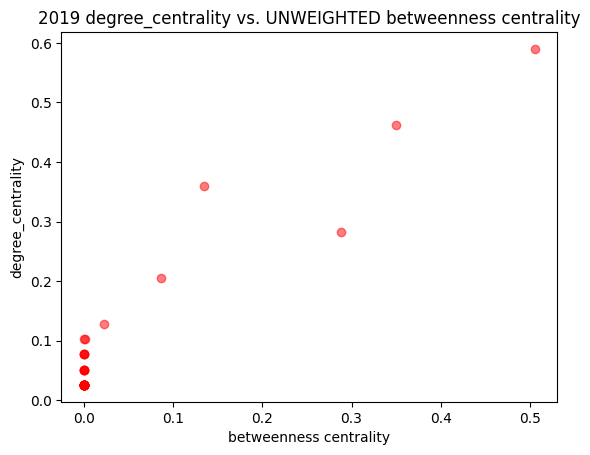

Pearson's correlation: 0.9483078286995766


In [12]:
x=list(betweenness_centrality_unweighted['2019'].values())
y=list(degree_centrality['2019'].values())
plt.scatter(x, y, color = 'red', alpha=0.5)
plt.xlabel('betweenness centrality')
plt.ylabel('degree_centrality')
plt.title('2019 degree_centrality vs. UNWEIGHTED betweenness centrality')
plt.show()
pearson = sp.pearsonr(x,y)[0]
print(f"Pearson's correlation: {pearson}")

In [13]:
corr = []
for i in years:
    year = str(i)
    x = list(betweenness_centrality_unweighted[year].values())
    y = list(degree_centrality[year].values())
    pearson = sp.pearsonr(x,y)[0]
    corr.append(pearson)

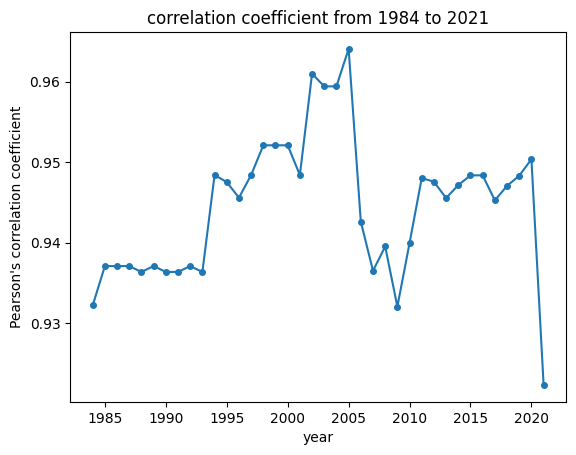

In [14]:
plt.plot(years, corr, linestyle='-', marker='o', markersize = 4)
plt.xlabel('year')
plt.ylabel('Pearson\'s correlation coefficient')
plt.title('correlation coefficient from 1984 to 2021')
plt.show()

# 3.2.3 Evolving communities

## a) Clauset Newman and Moore algorithm

In [15]:
comm_CNM = {}
for name, graph in graphs.items():
    cnm = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM[name] = cnm

In [16]:
#add community to node attributes
#return {node: community number}
def cnm_community_nodes(graph, comm):
    d = {}
    for community,nodes in enumerate(comm):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [17]:
#community for all 3 datasets
community_graphs = {}
for name, graph in graphs.items():
    community = cnm_community_nodes(graph, comm_CNM[name])
    community_graphs[name] = community

In [18]:
def plot_community(name, graph):
    #plt.figure(figsize=(12,12))  
    plt.title("Clauset Newman and Moore: dataset " + name)
    nx.draw(graph, node_color = [community_graphs[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.text(1,1,"Number of communities: " + str(max(community_graphs[name].values())))
    plt.show()
    #print("Number of communities: " + str(max(community_graphs[name].values())))

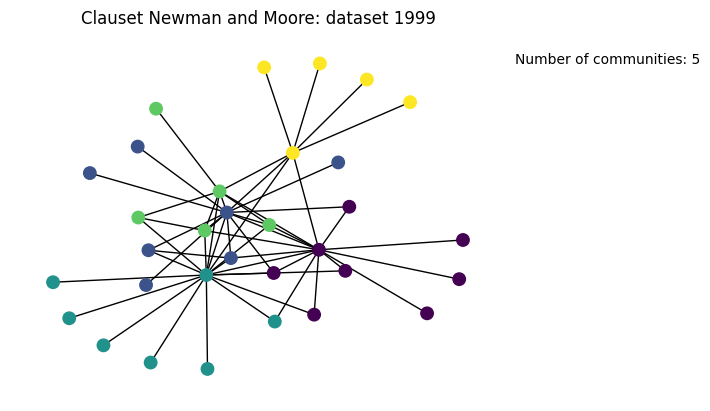

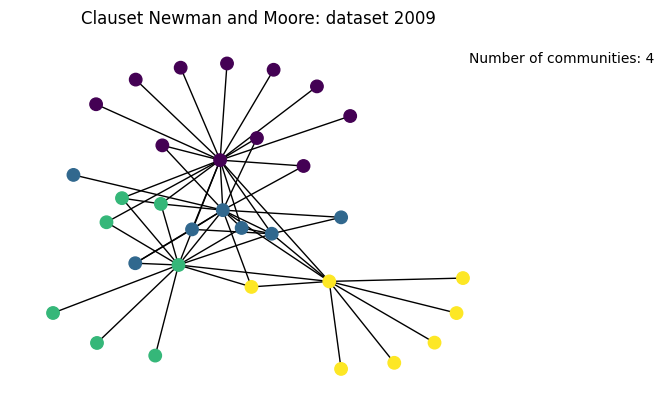

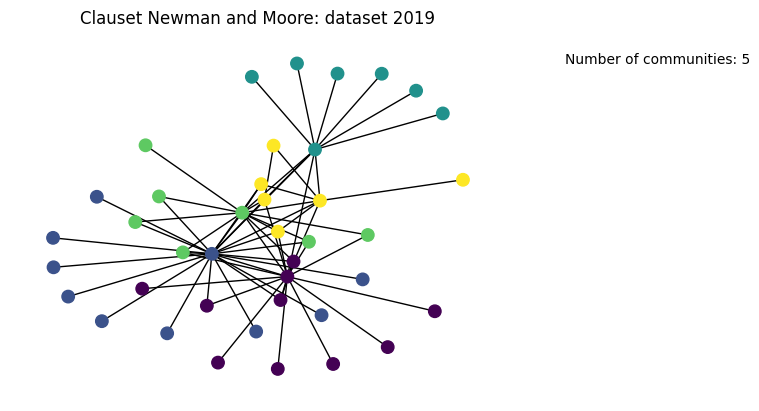

In [19]:
plot_community('1999',graphs['1999'])
plt.show()
plot_community('2009',graphs['2009'])
plt.show()
plot_community('2019',graphs['2019'])
plt.show()

## b) Louvain method

In [20]:
import community as community_louvain
import matplotlib.cm as cm

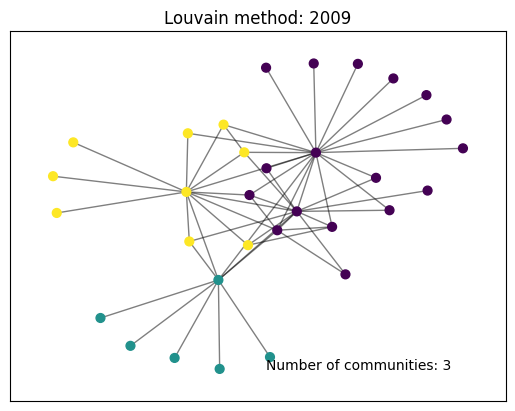

In [21]:
plt.title("Louvain method: 2009")
partition = community_louvain.best_partition(graphs['2009'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['2009'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2009'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2009'], pos, alpha=0.5)
plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

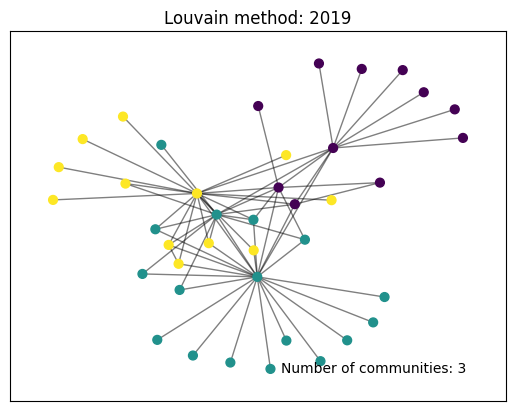

In [22]:
plt.title("Louvain method: 2019")
partition = community_louvain.best_partition(graphs['2019'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['2019'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2019'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2019'], pos, alpha=0.5)
plt.text(0.1,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

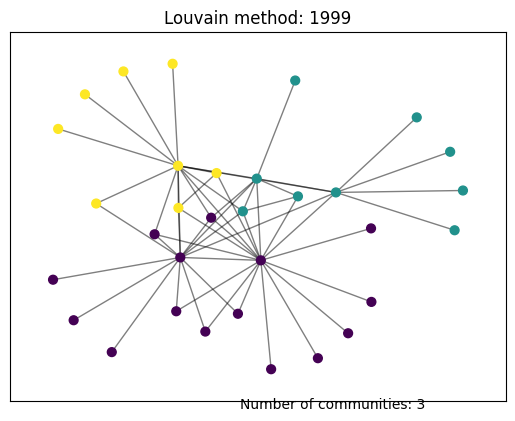

In [23]:
plt.title("Louvain method: 1999")
partition = community_louvain.best_partition(graphs['1999'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['1999'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['1999'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['1999'], pos, alpha=0.5)
plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

In [24]:
'''
def plot_louvian(name, graph):
    plt.title("Louvain method: dataset " + name)
    partition = community_louvain.best_partition(graph, weight = 'Aircraft_Trips')
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
    plt.show()
'''

'\ndef plot_louvian(name, graph):\n    plt.title("Louvain method: dataset " + name)\n    partition = community_louvain.best_partition(graph, weight = \'Aircraft_Trips\')\n    cmap = cm.get_cmap(\'viridis\', max(partition.values()) + 1)\n    nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))\n    nx.draw_networkx_edges(graph, pos, alpha=0.5)\n    plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))\n    plt.show()\n'

In [25]:
#plot_louvian('1999', graphs['1999'])
#plt.show()
#plot_louvian('2009', graphs['2009'])
#plt.show()
#plot_louvian('2019', graphs['2019'])
#plt.show()

## Map

In [28]:
df = pd.read_csv("data/Australia_airline/Australia Geolocation.csv")

In [41]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df['Long'],
    lat = df['Lat'],
    hoverinfo = 'text',
    text = df['City1'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

In [42]:
df_1999 = pd.read_csv("data/Australia_airline/map/1999.csv")

In [43]:
lons = []
lats = []
lons = np.empty(3 * len(df_1999))
lons[::3] = df_1999['start_lon']
lons[1::3] = df_1999['end_lon']
lons[2::3] = None
lats = np.empty(3 * len(df_1999))
lats[::3] = df_1999['start_lat']
lats[1::3] = df_1999['end_lat']
lats[2::3] = None

In [44]:
fig.add_trace(
    go.Scattergeo(
        locationmode = 'ISO-3',
        lon = lons,
        lat = lats,
        mode = 'lines',
        line = dict(width = 1,color = 'red'),
        opacity = 0.5
    )
)

In [60]:
fig.update_layout(
    title_text = 'Australia domestic airline network',
    showlegend = False,
    geo = go.layout.Geo(
        #scope = 'asia',
        projection_type = 'airy',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    height=700,
)